# Proyecto Final - Coterminal
- Carlos Andrés Zuluaga Mora
- Ricardo Andrés Cortés Coronell
- Andrés Felipe Sanchez Rincon

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preparación de Datos

In [14]:

file_path = 'estimated-cumulative-excess-deaths-per-100000-people-during-covid-19.csv'
df = pd.read_csv(file_path)

# Cambio de nombres de columnas
df.rename(columns={
    'Entity': 'Pais',
    'Day': 'Fecha',
    'Cumulative excess deaths per 100,000 people (central estimate)': 'Exceso_Muertes_Central',
    'Cumulative excess deaths per 100,000 people (95% CI, lower bound)': 'Exceso_Muertes_Inferior',
    'Cumulative excess deaths per 100,000 people (95% CI, upper bound)': 'Exceso_Muertes_Superior',
    'Total confirmed deaths due to COVID-19 per 100,000 people': 'Muertes_Confirmadas_100k'
}, inplace=True)

# Convertir la columna 'Fecha' a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# La columna de muertes confirmadas tiene nulos al inicio. Asumimos que son 0.
df['Muertes_Confirmadas_100k'].fillna(0, inplace=True)
# Para el análisis, las filas sin una estimación central de exceso de muertes no son útiles.
df.dropna(subset=['Exceso_Muertes_Central'], inplace=True)

# Mostrar los datos limpios
df_clean = df[['Pais', 'Fecha', 'Exceso_Muertes_Central', 'Muertes_Confirmadas_100k']].copy()

print("--- Resumen del DataFrame Limpio ---")
df_clean.info()

print("\n--- Primeras filas de los datos procesados ---")
print(df_clean.head())

# Datos finales por país como en el notebook anterior.
df_final = df.loc[df.groupby('Pais')['Fecha'].idxmax()].copy()
df_final = df_final[df_final['Exceso_Muertes_Central'] > 0]

# Nueva columna 'Brecha_Reporte'
df_final['Brecha_Reporte'] = df_final['Exceso_Muertes_Central'] - df_final['Muertes_Confirmadas_100k']

# Columnas numéricas para la matriz de correlación
correlation_data = df_final[[
    'Exceso_Muertes_Central',
    'Muertes_Confirmadas_100k',
    'Exceso_Muertes_Inferior',
    'Exceso_Muertes_Superior',
    'Brecha_Reporte'
]]

--- Resumen del DataFrame Limpio ---
<class 'pandas.core.frame.DataFrame'>
Index: 55458 entries, 0 to 509042
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Pais                      55458 non-null  object        
 1   Fecha                     55458 non-null  datetime64[ns]
 2   Exceso_Muertes_Central    55458 non-null  float64       
 3   Muertes_Confirmadas_100k  55458 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.1+ MB

--- Primeras filas de los datos procesados ---
          Pais      Fecha  Exceso_Muertes_Central  Muertes_Confirmadas_100k
0  Afghanistan 2020-01-01               -0.022148                       0.0
1  Afghanistan 2020-01-06               -0.044295                       0.0
2  Afghanistan 2020-01-13               -0.047579                       0.0
3  Afghanistan 2020-01-20                0.022123               

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35192\1067174844.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Muertes_Confirmadas_100k'].fillna(0, inplace=True)


## Análisis de correlación entre exceso de muerte y muertes confirmadas (Posible analisis aun sujeto a revisión)

In [15]:
# Fecha más reciente para cada país
df_final = df_clean.loc[df_clean.groupby('Pais')['Fecha'].idxmax()]

# Eliminación de valores negativos o cero en exceso de muertes
df_final = df_final[df_final['Exceso_Muertes_Central'] > 0]

print("--- Datos finales acumulados por país (ejemplo) ---")
print(df_final.head())

--- Datos finales acumulados por país (ejemplo) ---
                 Pais      Fecha  Exceso_Muertes_Central  \
233       Afghanistan 2024-06-17               422.11630   
4326          Albania 2024-06-17               550.91364   
6373          Algeria 2024-06-17               294.52670   
8420   American Samoa 2024-06-17               176.74866   
10467         Andorra 2024-06-17               223.76707   

       Muertes_Confirmadas_100k  
233                   19.709799  
4326                 127.494995  
6373                  15.130612  
8420                  70.361330  
10467                199.560710  


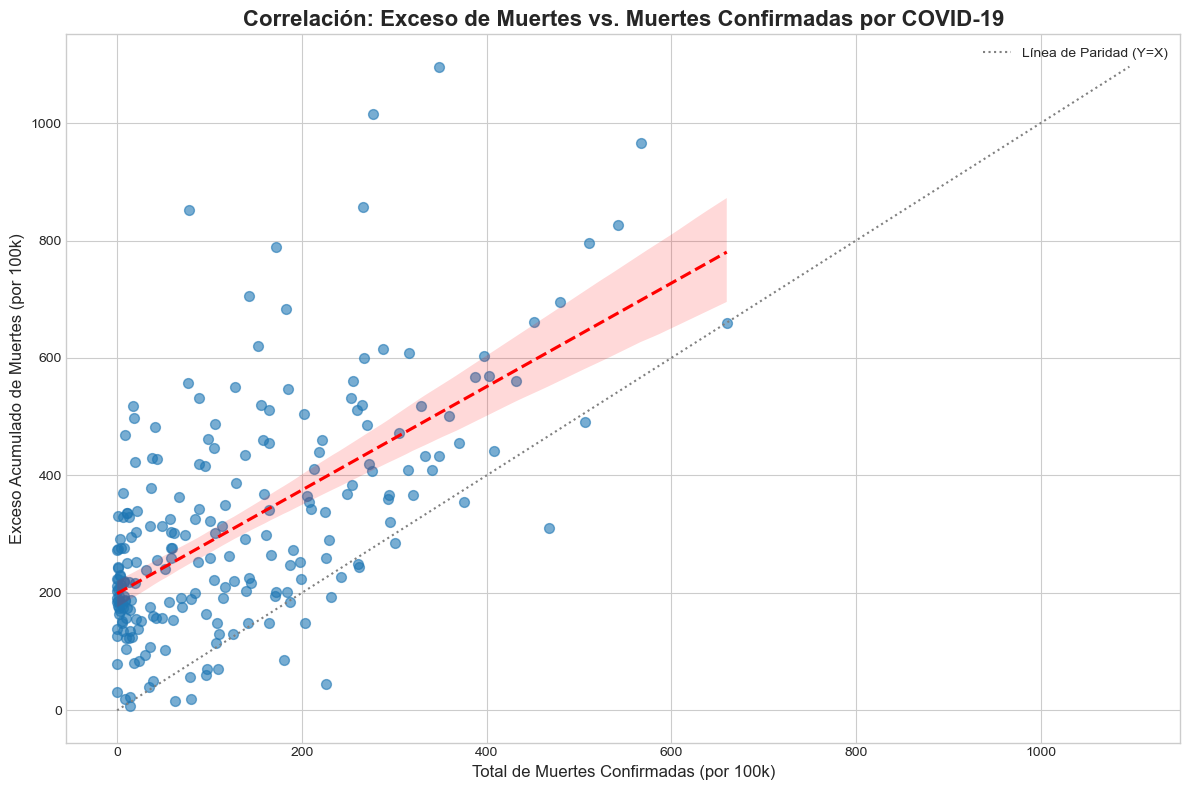

In [ ]:
# Configuración del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Gráfico de dispersión con línea de regresión
sns.regplot(
    data=df_final,
    x='Muertes_Confirmadas_100k',
    y='Exceso_Muertes_Central',
    scatter_kws={'alpha': 0.6, 's': 50}, # Estilo de los puntos
    line_kws={'color': 'red', 'linestyle': '--'} # Estilo de la línea
)

# Línea de referencia Y=X
max_val = max(df_final['Muertes_Confirmadas_100k'].max(), df_final['Exceso_Muertes_Central'].max())
plt.plot([0, max_val], [0, max_val], color='grey', linestyle=':', label='Línea de Paridad (Y=X)')

# Títulos y etiquetas
plt.title('Correlación: Exceso de Muertes vs. Muertes Confirmadas por COVID-19', fontsize=16, weight='bold')
plt.xlabel('Total de Muertes Confirmadas (por 100k)', fontsize=12)
plt.ylabel('Exceso Acumulado de Muertes (por 100k)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [17]:
# Calculo de correlación
correlation = df_final['Muertes_Confirmadas_100k'].corr(df_final['Exceso_Muertes_Central'])

print(f"El coeficiente de correlación de Pearson es: {correlation:.4f}")

El coeficiente de correlación de Pearson es: 0.6181


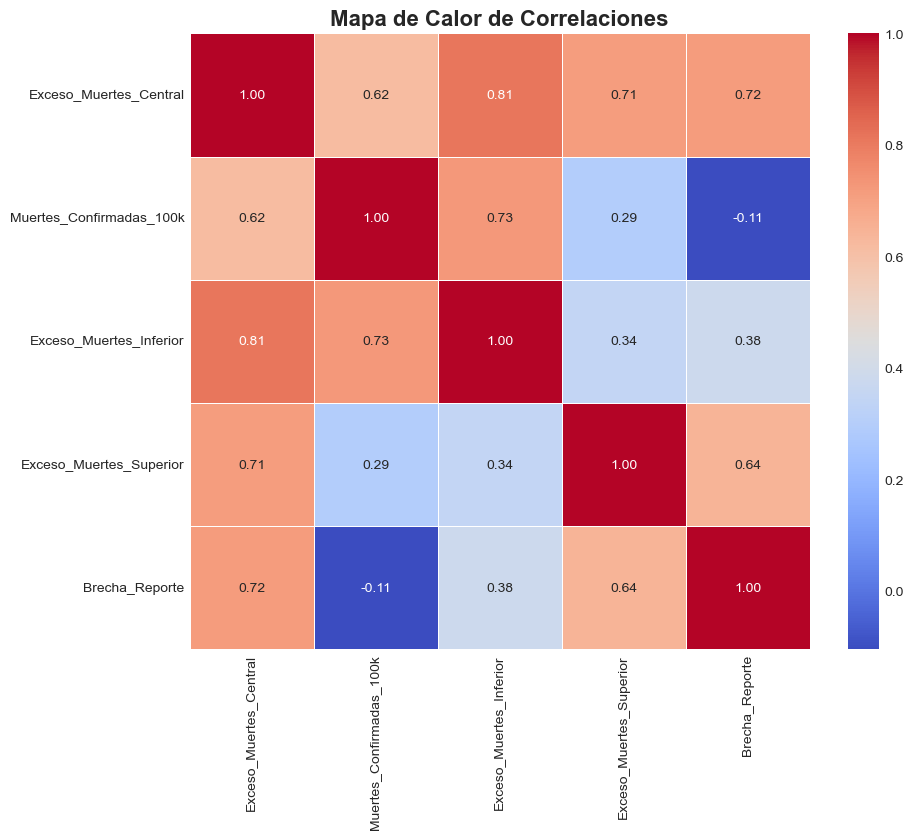

In [12]:
# Calcular la matriz de correlación
corr_matrix = correlation_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,      # Muestra los valores numéricos en cada celda
    cmap='coolwarm', # Elige una paleta de colores (azul=negativo, rojo=positivo)
    fmt=".2f",       # Formatea los números a dos decimales
    linewidths=.5
)

plt.title('Mapa de Calor de Correlaciones', fontsize=16, weight='bold')
plt.show()